<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Vector_Similarity_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

벡터의 유사도

문장이나 문서의 유사도를 구하는 작업은 자연어 처리의 주요 주제 중 하나입니다. 사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존합니다. 기계도 마찬가지입니다. **기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있습니다.**

https://www.kernix.com/blog/similarity-measure-of-textual-documents_p12




# 1. 코사인 유사도

BoW에 기반한 단어 표현 방법인 DTM, TF-IDF, 또는 뒤에서 배우게 될 Word2Vec 등과 같이 단어를 수치화할 수 있는 방법을 이해했다면 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는 게 가능합니다.



## 1) 코사인 유사도(Cosine Similarity)

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

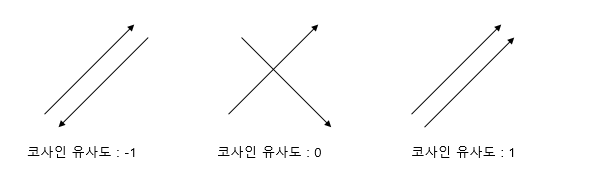



두 벡터 A, B에 대해서 코사인 유사도는 식으로 표현하면 다음과 같습니다.

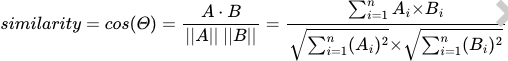


문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다. 예시를 통해 문서 단어 행렬에 대해서 코사인 유사도를 구해봅시다.

문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

뛰어쓰기 기준 토큰화를 진행했다고 가정하고, 위의 세 문서에 대해서 문서 단어 행렬을 만들면 이와 같습니다.

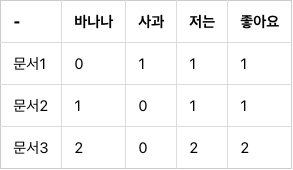

Numpy를 사용해서 코사인 유사도를 계산하는 함수를 구현하고 각 문서 벡터 간의 코사인 유사도를 계산해보겠습니다.

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B) / (norm(A) * norm(B))

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print('문서 1과 문서 2의 유사도 :', cos_sim(doc1, doc2))
print('문서 1과 문서 3의 유사도 :', cos_sim(doc1, doc3))
print('문서 2와 문서 3의 유사도 :', cos_sim(doc2, doc3))

문서 1과 문서 2의 유사도 : 0.6666666666666667
문서 1과 문서 3의 유사도 : 0.6666666666666667
문서 2와 문서 3의 유사도 : 1.0000000000000002


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 예를 들어보겠습니다. 문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다. 그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다. 이런 경우 유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있습니다. 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있습니다. 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.



## 2) 유사도를 이용한 추천 시스템 구현하기

캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됩니다. 해당 데이터는 총 24개의 열을 가진 45,466개의 샘플로 구성된 영화 정보 데이터입니다.



In [1]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ ['KAGGLE_USERNAME']="pseudoexaminee"
os.environ ['KAGGLE_KEY']= '88c6590eca43e150bc61849bec962363'

In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d rounakbanik/the-movies-dataset

 97% 222M/228M [00:00<00:00, 256MB/s]
100% 228M/228M [00:00<00:00, 257MB/s]


In [7]:
!unzip '*.zip'

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


다운로드 받은 훈련 데이터에서 상위 5개의 샘플만 출력하여 데이터의 형식을 확인합니다.



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


훈련 데이터는 총 24개의 열을 갖고있으나 책의 지면의 한계로 일부 생략합니다. 여기서 코사인 유사도에 사용할 데이터는 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열입니다. 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템을 만들 것입니다.



In [9]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

만약 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면 위와 같이 데이터를 줄여서 재저장할 수 있습니다. 여기서는 상위 20,000개의 샘플만 사용하겠습니다. TF-IDF를 연산할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. TF-IDF의 대상이 되는 data의 overview 열에 결측값에 해당하는 Null 값이 있는지 확인합니다.



In [10]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('oveview 열의 결측값의 수:', data['overview'].isnull().sum())

oveview 열의 결측값의 수: 135


135개의 Null 값이 있다고 합니다. 이 경우 결측값을 가진 행을 제거하는 pandas의 dropna()나 결측값이 있던 행에 특정값으로 채워넣는 pandas의 fillna()를 사용할 수 있습니다. 괄호 안에 Null 대신 넣고자하는 값을 넣으면 되는데, 여기서는 빈 값(empty value)으로 대체하였습니다.



In [11]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

Null 값을 빈 값으로 대체하였습니다. overview열에 대해서 TF-IDF 행렬을 구한 후 행렬의 크기를 출력해봅시다.



In [12]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :', tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다. 다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미합니다. 또는 47,847차원의 문서 벡터가 20,000개가 존재한다고도 표현할 수 있을 겁니다. 이제 20,000개의 문서 벡터에 대해서 상호 간의 코사인 유사도를 구합니다.



In [13]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :', cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다. 이는 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬입니다. 모든 20,000개 영화의 상호 유사도가 기록되어져 있습니다. 이제 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다.



In [18]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.



In [22]:
def get_recommendations(title, cosine_sim=cosine_sim):
  # 선택한 영화의 타이틀로부터 영화의 인덱스를 받아온다.
  idx = title_to_index[title]

  # 해당 영화와 모든 영화와의 유사도를 가져온다.
  sim_scores = list(enumerate(cosine_sim[idx]))
  
  # 유사도에 따라 영화들을 정렬한다.
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse= True)

  # 가장 유사한 10개의 영화를 받아온다.
  sim_scores = sim_scores[1:11]

  # 가장 유사한 10개의 영화 인덱스를 얻는다.
  movie_indices = [idx[0] for idx in sim_scores]

  # 가장 유사한 10개의 영화 제목을 리턴한다.
  return data['title'].iloc[movie_indices]

영화 다크 나이트 라이즈와 overview가 유사한 영화들을 찾아보겠습니다.



In [23]:
get_recommendations('The Dark Knight Rises')


12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

가장 유사한 영화가 출력되는데, 영화 다크 나이트가 첫번째고, 그 외에도 전부 배트맨 영화를 찾아낸 것을 확인할 수 있습니다.



# 2. 여러가지 유사도 기법

문서의 유사도를 구하기 위한 방법으로는 코사인 유사도 외에도 여러가지 방법들이 있습니다. 여기서는 문서의 유사도를 구할 수 있는 다른 방법들을 학습합니다.



## 1) 유클리드 거리(Euclidean distance)

유클리드 거리(euclidean distance)는 문서의 유사도를 구할 때 자카드 유사도나 코사인 유사도만큼, 유용한 방법은 아닙니다. 하지만 여러 가지 방법을 이해하고, 시도해보는 것 자체만으로 다른 개념들을 이해할 때 도움이 되므로 의미가 있습니다.

다차원 공간에서 두개의 점 p와 q가 각각 p = (p1, p2, p3, ... , pn)과 q=(q1, q2, q3, ... , qn)의 좌표를 가질 때 두 점 사이의 거리를 계산하는 유킬리드 거리 공식은 다음과 같다.

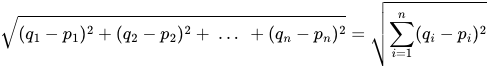

다차원 공간이라고 가정하면, 처음 보는 입장에서는 식이 너무 복잡해보입니다. 좀 더 쉽게 이해하기위해서 2차원 공간이라고 가정하고 두 점 사이의 거리를 좌표 평면 상에서 시각화해보겠습니다.

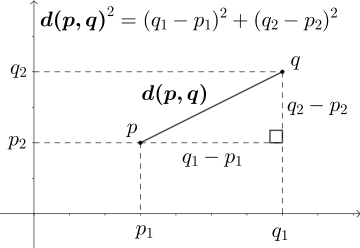

2차원 좌표 평면 상에서 두 p점 q와 사이의 직선 거리를 구하는 문제입니다. 위의 경우에는 직각 삼각형으로 표현이 가능하므로, 중학교 수학 과정인 피타고라스의 정리를 통해 p와q  사이의 거리를 계산할 수 있습니다. 즉, 2차원 좌표 평면에서 두 점 사이의 유클리드 거리 공식은 피타고라스의 정리를 통해 두 점 사이의 거리를 구하는 것과 동일합니다.

다시 원점으로 돌아가서 여러 문서에 대해서 유사도를 구하고자 유클리드 거리 공식을 사용한다는 것은, 앞서 본 2차원을 단어의 총 개수만큼의 차원으로 확장하는 것과 같습니다. 예를 들어 아래와 같은 DTM이 있다고 합시다.

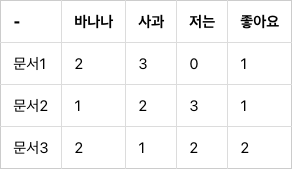

단어의 개수가 4개이므로, 이는 4차원 공간에 문서1, 문서2, 문서3을 배치하는 것과 같습니다. 이때 다음과 같은 문서Q에 대해서 문서1, 문서2, 문서3 중 가장 유사한 문서를 찾아내고자 합니다.

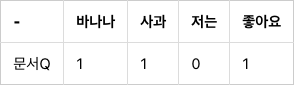

이때 유클리드 거리를 통해 유사도를 구하려고 한다면, 문서Q 또한 다른 문서들처럼 4차원 공간에 배치시켰다는 관점에서 4차원 공간에서의 각각의 문서들과의 유클리드 거리를 구하면 됩니다. 이를 파이썬 코드로 구현해보겠습니다.



In [24]:
import numpy as np

def dist(x, y):
  return np.sqrt(np.sum(((x-y)**2)))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))


문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미합니다. 즉, 문서1이 문서Q와 가장 유사하다고 볼 수 있습니다.



## 2) 자카드 유사도(Jaccard similarity)

A와 B 두개의 집합이 있다고 합시다. 이때 교집합은 두 개의 집합에서 공통으로 가지고 있는 원소들의 집합을 말합니다. 즉, **합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것이 자카드 유사도(jaccard similarity)의 아이디어**입니다. 자카드 유사도는 0과 1사이의 값을 가지며, 만약 두 집합이 동일하다면 1의 값을 가지고, 두 집합의 공통 원소가 없다면 0의 값을 갖습니다. 자카드 유사도를 구하는 함수를 J라고 하였을 때, 자카드 유사도 함수 J는 아래와 같습니다.

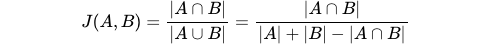

두 개의 비교할 문서를 각각 doc1, doc2 라고 했을 때 doc1과 doc2 의 문서의 유사도를구하기 위한 자카드 유사도는 이와 같습니다.

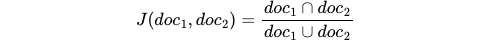

두 문서 doc1, doc2 사이의 자카드 유사도 
J(doc1, doc2) 는 두 집합의 교집합 크기를 두 집합의 합집합 크기로 나눈 값으로 정의됩니다. 간단한 예를 통해서 이해해보겠습니다.



In [25]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서 1 :', tokenized_doc1)
print('문서 2 :', tokenized_doc2)

문서 1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서 2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


문서1과 문서2의 합집합을 구해보겠습니다.



In [26]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :', union)

문서1과 문서2의 합집합 : {'like', 'banana', 'likey', 'love', 'passport', 'card', 'everyone', 'watch', 'you', 'coupon', 'holder', 'apple'}


문서1과 문서2의 합집합의 단어의 총 개수는 12개입니다. 이제 문서1과 문서2의 교집합을 구해보겠습니다. 문서1과 문서2에서 둘 다 등장한 단어를 찾으면 됩니다.



In [27]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :', intersection)

문서1과 문서2의 교집합 : {'banana', 'apple'}


문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개입니다. 이제 교집합의 크기를 합집합의 크기로 나누면 자카드 유사도가 계산됩니다.


In [28]:
print('자카드 유사도 :', len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666
